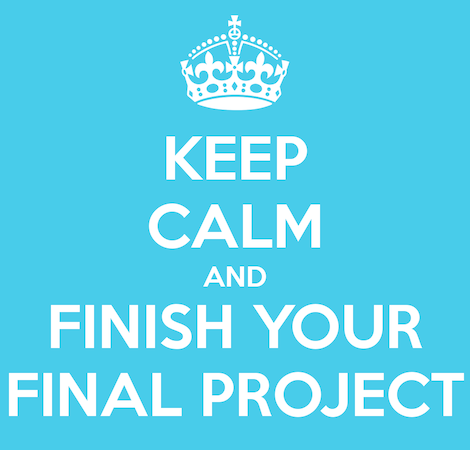

In [4]:
#Save to S3
!aws s3 cp '/home/ubuntu/notebooks/intro_to_ml/day_6/FinalProject-amitkatz.ipynb' s3://uatt-e1-amitkatz/intro_to_ml/day_6/FinalProject-amitkatz.ipynb

upload: ./FinalProject-amitkatz.ipynb to s3://uatt-e1-amitkatz/intro_to_ml/day_6/FinalProject-amitkatz.ipynb


In [5]:
#Load
!aws s3 cp s3://uatt-e1-amitkatz/intro_to_ml/day_6/FinalProject-amitkatz.ipynb '/home/ubuntu/notebooks/intro_to_ml/day_6/.'

download: s3://uatt-e1-amitkatz/intro_to_ml/day_6/FinalProject-amitkatz.ipynb to ./FinalProject-amitkatz.ipynb


# Overview

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

In [6]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
#Sample the data to prevent the Kernel from crashing - disable it in final submission 
data = data.sample(1000000)
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
1505019,664f330e-b677-44fc-878d-32b2eff1ffab,1541218796785,com.banananadco.blackjack,CA,T-Mobile USA,LG,MP260,7.0,1193,720,chartboost,0
1078764,729e2690-17d6-44ee-8b91-93f4188bd861,1541769758622,com.cyberwoody.wakandaburger,LA,AT&T U-verse,ALCATEL,A574BL,7.1.1,480,854,chartboost,0
1251059,28801da4-a524-40c9-b6ea-f574c9462d3b,1538188071007,com.mss.doublediamond,IL,Verizon Wireless,Verizon,QTASUN1,7.0,1920,1200,chartboost,0
52974,a2091c1b-bcb8-423e-8c7d-0668bed03434,1541621792822,air.com.wildtripleslots,VA,Comcast Cable,LG,MP450,7.0,1080,1920,chartboost,0
3134373,0c7b90fd-640c-4312-a9ff-086c6f60bdd3,1539882267076,br.com.tapps.sharkevolution,UT,Direct Communications,Samsung,SM-J320V,7.1.1,1280,720,chartboost,1


<p style="line-height:1.75;font-size:16px">
Your task is to predict if a user will click or not on the ad.

# Guidelines

<p style="line-height:1.75;font-size:16px">
You will have two weeks to complete this project during which we will have two half-days dedicated to this. Besides giving you the chance to gain experience and showcase what you've learned, this project is intended to give you a glimpse into the actual process and work of a data scientist.<br> Before we talk about the task itself, here are some important guidelines:<br>
1\. <b>Show your work</b> - if you've tried something and it didn't work that's fine, don't delete it. Data science is an iterative process and we can learn a lot from what didn't work. Explain what didn't work and the reasons for it.<br>
2\. <b>Explain your work</b> - don't just write a bunch of code and the final output. Explain the motivation for each step you take, describe the results you got and what they mean. <br>
3\. <b>Use visualizations</b> - while exploring the data or when trying to convey an important message, use plots to help you. That being said, don't force yourself to add plots if they're not really needed.<br>
4\. <b>Plan ahead</b> - if you start working on the project near the submission date you will have less time to ask questions and come up with ideas.<br>
5\. <b>Google is your friend</b> - while we've learned the basic skills required to complete this project, there are many other techniques and ideas we didn't have time to talk about. Don't limit yourself to the lessons, search for similar problems and how to approach them, exchange ideas with colleagues and don't be afraid to try new ideas. <br>
6\. <b>It's not about the score</b> - while reaching a good prediction score is nice, it's not the main purpose of this project. Use this project to show your understanding and reasoning as well as your technical skills.<br>
7\. <b>Write clean code</b> - make sure you write code that is easy to read and understand. Give meaningful names, use functions, add comments if needed.<br>
8\. <b>Test before submission</b> - your work should be submitted as a Jupyter Notebook. Before submitting it, make sure you run it from start to finish and verify that there are no errors.<br>
9\. <b>Enjoy it</b> - try to have fun working on this, be curious, look for interesting insights and take pride in completing a real-world project end-to-end.

# Tips

<p style="line-height:1.75;font-size:16px">
1\. Since the data is time sensitive, split it so that the test data will be the last month of data and the training data will be anything that came before that.<br>
2\. `play_apps.zip` is data from Google Play about the various apps in the dataset. You can use this to augment the impressions dataset.<br>
3\. The data is collected from customers in the US (multiple timezones).<br>

In [7]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/a008.com.fc2.blog.androidkaihatu.datecamera2'
app = pickle.loads(app_details.read(app_file))
app

{'title': 'DateCamera2 (Auto timestamp)',
 'icon': 'https://lh3.googleusercontent.com/BvVD8_9aN_-wrqP7WTeF4u40MocWdbNoxxlU_HR1GnRT9SGxZmV3JEQbjCaRVj5880e3',
 'screenshots': ['https://lh3.googleusercontent.com/_CJBocPzM9CF2CPrnnvbEX5-9NllpY2AsqB9e8hyoDDwUIC_dv95Q7dehq8Tu7KKX1c=w720-h310-rw',
  'https://lh3.googleusercontent.com/zQUynoLG5VJd2dV4leUNCvqehyDMVbBVEiqWdKpL35CqkbxDsatCeGOuEviAGTEvHMI=w720-h310-rw',
  'https://lh3.googleusercontent.com/u7Yg9yiCLx9Jou2CqfUr0I1w1I08km_n0I-VCC7Tc8IE-lmqUtHfCemPChNnaO5n6dk=w720-h310-rw',
  'https://lh3.googleusercontent.com/KPcyVSjtX3dvVy8WP2G67U8G8xK2IQHhqWa0nnlPevCr-BaQm31t46StfEs96UTFtZBt=w720-h310-rw',
  'https://lh3.googleusercontent.com/dgUVp1C2nbIcj5XOKLGidzPkvBmWKwXzCxwuHwhhMkn7s8rve6gF-NkTHuuInr0GBA=w720-h310-rw',
  'https://lh3.googleusercontent.com/M0YDP301kQu6WsQxt9fZfsxGRumFrWZnTyPGNlcjeWDbLufl5CC4vDm1Z5F9SUiCR8I=w720-h310-rw',
  'https://lh3.googleusercontent.com/nWRsvYhsHsdmP3W7YC9L9J-vA8prbPIbWVi7mERMU_0jzI_92lU7mYd6gCajORcHBw=w720

In [8]:
#Explore the data - there are lots of categorical data columns
data.dtypes

bidid            object
utc_time          int64
app_id           object
user_state       object
user_isp         object
device_maker     object
device_model     object
device_osv       object
device_height     int64
device_width      int64
marketplace      object
click             int64
dtype: object

In [9]:
#No column is the index right now
data.index

Int64Index([1505019, 1078764, 1251059,   52974, 3134373, 2714980, 2301572,
            2309632,  587214, 1225413,
            ...
            1974828, 1118453, 2766779, 2012525, 1189544,  587457,  478934,
            2574133, 1595709, 1627149],
           dtype='int64', length=1000000)

In [10]:
#get_dummkes will produe a lot of columns
data.nunique(axis=0)

bidid            978642
utc_time         999867
app_id            11855
user_state           51
user_isp           2710
device_maker        207
device_model       1857
device_osv           17
device_height       259
device_width        196
marketplace           1
click                 2
dtype: int64

In [11]:
#device_maker and device_model - close to 1/3 of the data is missing, given the ratio of table size(3148828)
data.isna().sum()

bidid                 0
utc_time              0
app_id                0
user_state            0
user_isp             20
device_maker     306048
device_model     306000
device_osv            0
device_height         0
device_width          0
marketplace           0
click                 0
dtype: int64

In [12]:
#check imbalance - classes are imbalanced ~1/10
data.groupby('click')['click'].count()

click
0    932728
1     67272
Name: click, dtype: int64

In [13]:
#bidid is almost an index
#marketplace has only a single values
#device_maker and device_model - close to 1/3 of the data is missing, given the ratio of table size(3148828)
data.drop('bidid', axis=1, inplace=True)
data.drop('marketplace', axis=1, inplace=True)
data.drop('device_model', axis=1, inplace=True)
#data.drop('device_osv', axis=1, inplace=True)

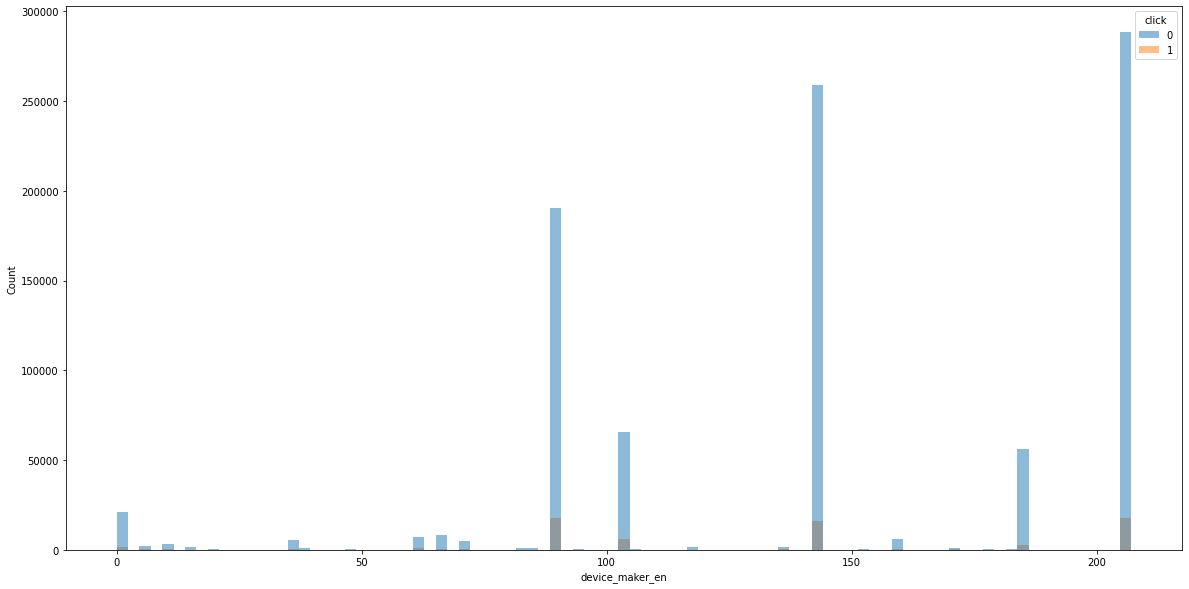

In [14]:
#Replace the content of bidid with LabelEncoder - not sure this column has significance, 
#at least it will save some memory
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook as tqdm
le = LabelEncoder()
le.fit(data['device_maker'])
data['device_maker_en'] = le.transform(data['device_maker'])

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=data, x='device_maker_en', hue='click', stat='count', edgecolor=None)
plt.show()

<ipython-input-15-f04aea77fdbd>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for maker in tqdm(data['device_maker'].unique()):


  0%|          | 0/208 [00:00<?, ?it/s]

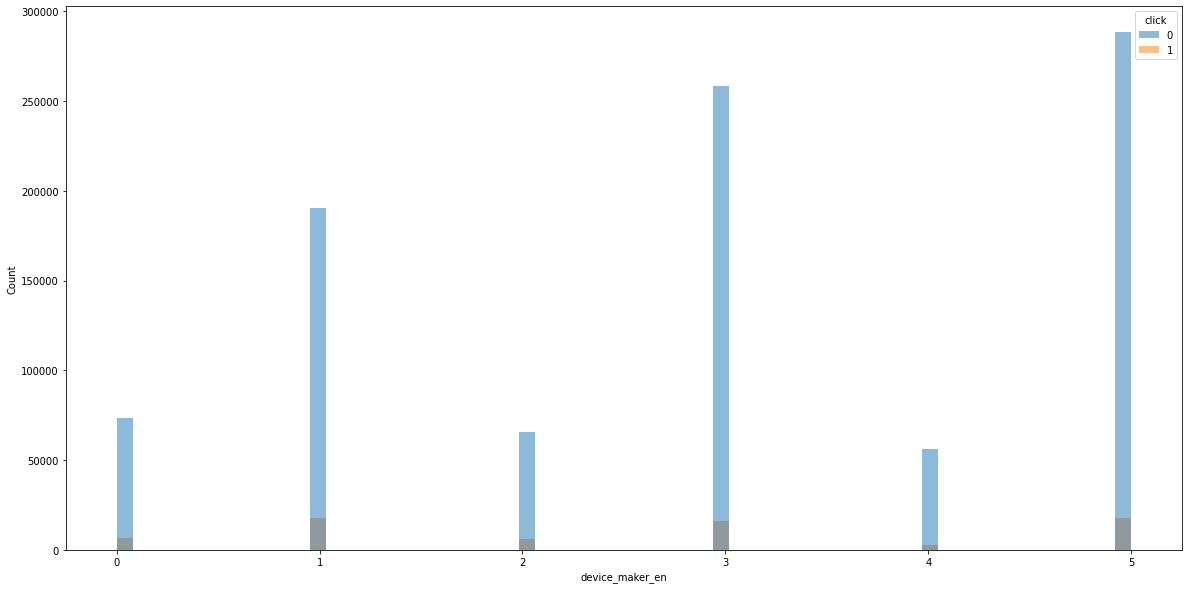

In [15]:
#device_maker is a sparse feature. Count shows that unsurpsirsingly most samples in the 
#data set are contributed by big device_makers. 
#Every device_maker that has less than 50K samples in the data set will be labeld as "Generic" to limit the get_dummies 
#feature space
significant_maker = 50000
#maker_value_count = data['device_maker'].value_counts()
for maker in tqdm(data['device_maker'].unique()):
    predicator = (data['device_maker'] == maker)
    makers_count = predicator.sum()
    if makers_count < significant_maker:
        #print("Replacing {} with Generic. It's sum {}".format(maker, makers_count))
        data.loc[predicator, 'device_maker'] = "Generic"

#Re-encode
le = LabelEncoder()
le.fit(data['device_maker'])
data['device_maker_en'] = le.transform(data['device_maker'])

#data.drop('device_maker', axis=1, inplace=True)
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=data, x='device_maker_en', hue='click', stat='count', edgecolor=None)
plt.show()
data.drop('device_maker_en', axis=1, inplace=True)

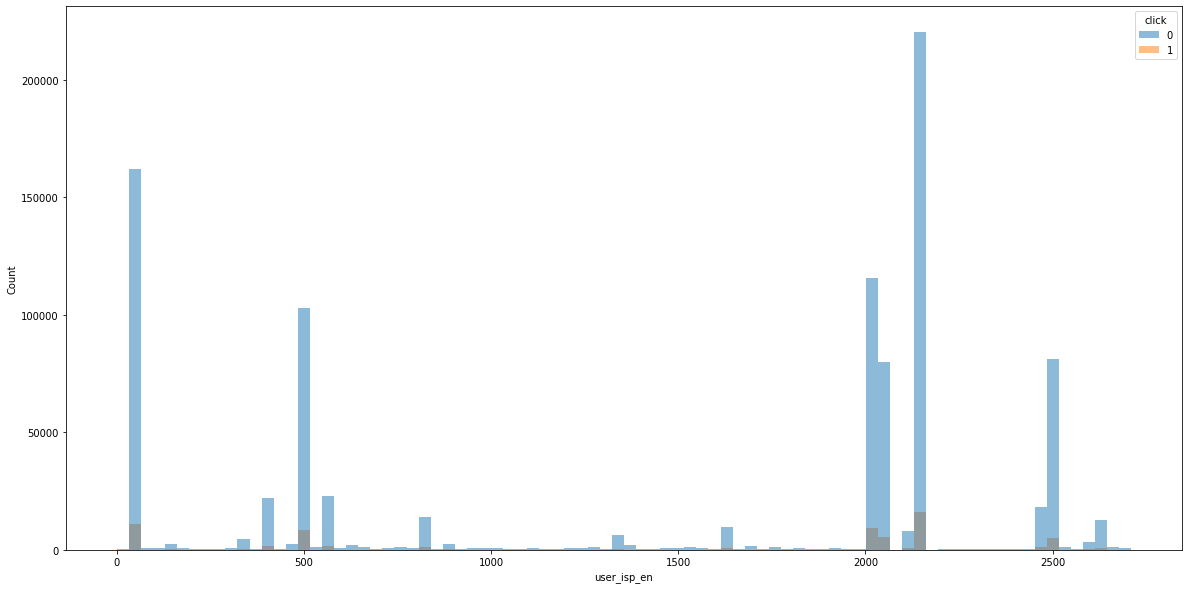

In [16]:
#Fill NaN for columns
data['user_isp'].fillna('unknown', inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['user_isp'])
data['user_isp_en'] = le.transform(data['user_isp'])

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=data, x='user_isp_en', hue='click', stat='count', edgecolor=None)
plt.show()

<ipython-input-17-8358ff025e83>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for isp in tqdm(data['user_isp'].unique()):


  0%|          | 0/2711 [00:00<?, ?it/s]

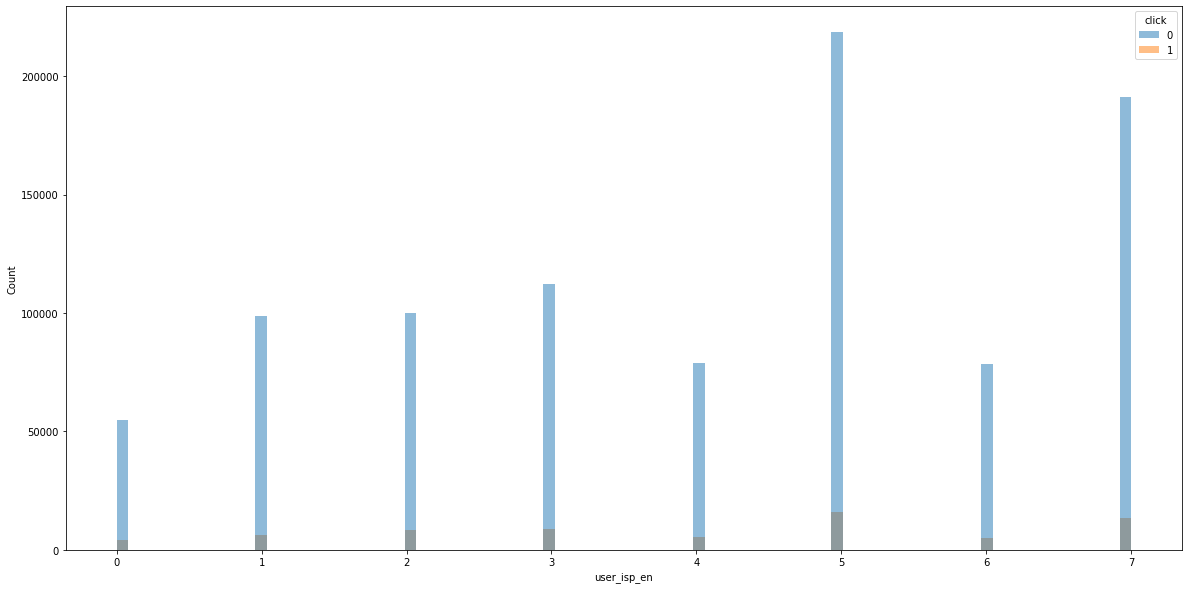

In [17]:
#user_isp is a sparse feature. Limit get_dummies feature space by removing small ISP
from tqdm import tqdm_notebook as tqdm
significant_isp = 30000

for isp in tqdm(data['user_isp'].unique()):
    predicator = (data['user_isp'] == isp)
    isp_count = predicator.sum()
    if isp_count < significant_isp:
        #print("Replacing {} with Generic. It's sum {}".format(maker, makers_count))
        data.loc[predicator, 'user_isp'] = "small_isp"
        
#Re-encoding
le = LabelEncoder()
le.fit(data['user_isp'])
data['user_isp_en'] = le.transform(data['user_isp'])

fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=data, x='user_isp_en', hue='click', stat='count', edgecolor=None)
plt.show()
#data set are contributed by big ISP
data.drop('user_isp_en', axis=1, inplace=True)
#data.drop('user_isp', axis=1, inplace=True)

In [18]:
#Feature "engineering" - produce a column for display area
data['view_area'] = data['device_height']*data['device_width']
data.drop('device_height', axis=1, inplace=True)
data.drop('device_width', axis=1, inplace=True)

In [19]:
#Make sure 'us' python package is installed
!sudo python -m pip install us
import us

     |████████████████████████████████| 132 kB 25.7 MB/s eta 0:00:01
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11929 sha256=a9b0b551e68cc72be1713b0c5a7ddf79df9ecdbed26aef1e3d9ffaae7db3ec96
  Stored in directory: /root/.cache/pip/wheels/07/4c/fa/a65ed0f9c00360e785327fc370eba55ca575cc3508ab13ed8e
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp38-cp38-linux_x86_64.whl size=80596 sha256=78244b9828be2d9a5b5a75e8cccdbabd1ceddd1780d63e4d2cbdaf1f2424a6b4
  Stored in directory: /root/.cache/pip/wheels/aa/a9/a6/359d736dbeda356e6ab8a7ff70a3db636cefe91df7d09f63dc
Successfully built us jellyfish


In [20]:
#Convert UTC timestamp to datetime, and align to the same timezone
#https://stackoverflow.com/questions/22800079/converting-time-zone-pandas-dataframe
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-zone-handling
#https://stackoverflow.com/questions/47661041/how-to-get-the-local-timezone-given-time-and-state-info
from datetime import datetime
import pytz

# tz_lookup = dict([(pytz.timezone(x).localize(datetime.now()).tzname(), pytz.timezone(x)) for x in pytz.all_timezones])
# tz_lookup
tz_list = pytz.all_timezones
match_tz = 0
for state in data['user_state'].unique():
    state_tz = us.states.lookup(state).capital_tz
    if state_tz not in tz_list:
        print("{} time zone not found in pytz".format(state_tz))
    else:
        match_tz = match_tz + 1
if match_tz == data['user_state'].nunique():
    print("All states timezones can be localized with pytz")
else:
    print("Only {} state timwzones can be matched".format(match_tz)) 

All states timezones can be localized with pytz


In [21]:
data['bid_time'] = pd.to_datetime(data['utc_time']/1000, 
                                       unit='s', 
                                       errors='raise')

In [22]:
#Sanity check
data['bid_time']

1505019   2018-11-03 04:19:56.785000192
1078764   2018-11-09 13:22:38.621999872
1251059   2018-09-29 02:27:51.007000064
52974     2018-11-07 20:16:32.822000128
3134373   2018-10-18 17:04:27.076000000
                       ...             
587457    2018-09-10 09:05:23.846999808
478934    2018-10-28 22:41:58.601000192
2574133   2018-10-10 18:01:46.315000064
1595709   2018-08-13 13:05:41.322000128
1627149   2018-09-19 21:17:01.842000128
Name: bid_time, Length: 1000000, dtype: datetime64[ns]

In [23]:
#localize every 'bid_time' to its own time zone
#https://stackoverflow.com/questions/26089670/unable-to-apply-methods-on-timestamps-using-series-built-ins
from tqdm import tqdm_notebook as tqdm
for stateLabel, df in tqdm(data.groupby('user_state')):
    #df['bid_time'].apply(lambda x: x.tz_localize(us.states.lookup(stateLabel).capital_tz, ambiguous='NaT'))
    df['bid_time'].dt.tz_localize(us.states.lookup(stateLabel).capital_tz, ambiguous='NaT').dt.tz_convert('US/Eastern')

print("Number of timestamps that ended up as NaT: {}".format(data[data['bid_time'].isnull()]['bid_time'].count()))

<ipython-input-23-3dcc59b0f1fa>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for stateLabel, df in tqdm(data.groupby('user_state')):


  0%|          | 0/51 [00:00<?, ?it/s]

Number of timestamps that ended up as NaT: 0


In [24]:
#Feature "engineering": add hour, minute columns that may be predictive of bid success
#after that, we drop the time columns
data['bid_month'] = data['bid_time'].dt.month
data['bid_hour'] = data['bid_time'].dt.hour
data['bid_minute'] = data['bid_time'].dt.minute
#No longer need the time stamp columns - it can't be handled as categorica data anyway
data.drop('utc_time', axis=1, inplace=True)
data.drop('bid_time', axis=1, inplace=True)

In [25]:
#Remind myself which columns are numeric
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1505019 to 1627149
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   app_id        1000000 non-null  object
 1   user_state    1000000 non-null  object
 2   user_isp      1000000 non-null  object
 3   device_maker  693952 non-null   object
 4   device_osv    1000000 non-null  object
 5   click         1000000 non-null  int64 
 6   view_area     1000000 non-null  int64 
 7   bid_month     1000000 non-null  int64 
 8   bid_hour      1000000 non-null  int64 
 9   bid_minute    1000000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 83.9+ MB


In [26]:
#Hot one encoding for categorica data -it fails "Unable to allocate array with shape (3148828, 14869) and data type uint8"
#so I must replace app_id with data from play_apps.zip
#data_one_hot = pd.get_dummies(data)

#Explore play_apps.zip
apps_category_count = [0,0,0,0,0,0] #I already know there are upto 2 categories for every app 
for items in tqdm(app_details.filelist):
    app = pickle.loads(app_details.read(items))
    num_app_cateogries = len(app['category'])
    apps_category_count[num_app_cateogries] = apps_category_count[num_app_cateogries] + 1
print("Apps in play_apps.zip category istorgram {}".format(apps_category_count))
#So I can "risk" and take the primary category for the app

<ipython-input-26-d23d8696eb39>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for items in tqdm(app_details.filelist):


  0%|          | 0/29463 [00:00<?, ?it/s]

Apps in play_apps.zip category istorgram [0, 28481, 982, 0, 0, 0]


In [27]:
#Create df_play_apps from play+apps.zip with columns we want to join with data
df_play_apps = pd.DataFrame(columns = ['app_id', 'category', 'installs', 'score'])
characters_to_remove = "+,"
for items in tqdm(app_details.filelist):
    app = pickle.loads(app_details.read(items))
    df = pd.DataFrame({'app_id':app['app_id'], \
                       'category': app['category'][0], \
                       'installs': app['installs'], \
                       'score': app['score']}, \
                      index = ['app_id'], \
                      columns = ['app_id', 'category', 'installs', 'score'])
    df_play_apps = df_play_apps.append(df)

<ipython-input-27-ef9eef4035ab>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for items in tqdm(app_details.filelist):


  0%|          | 0/29463 [00:00<?, ?it/s]

In [28]:
#Convert the score column to 
df_play_apps['score'] = pd.to_numeric(df_play_apps['score'], errors='coerce').fillna(0).astype(float)
#df_play_apps.sample(10)
df_play_apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29463 entries, app_id to app_id
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   app_id    29463 non-null  object 
 1   category  29463 non-null  object 
 2   installs  29462 non-null  object 
 3   score     29463 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [29]:
#join data and df_play_apps to be able to replace ['app_id'] with ['category', 'installs', 'score']
data_play_join = data.merge(df_play_apps, on='app_id')

In [30]:
#Change the bid_month to string so it avoids the scaler - we need to keep it to future split
data_play_join['bid_month'] = data_play_join['bid_month'].astype(str)
#Take a look at the results
data_play_join.sample(10)

,app_id,user_state,user_isp,device_maker,device_osv,click,view_area,bid_month,bid_hour,bid_minute,category,installs,score
287767,com.chateaustudios.sanicclickmaniaAndroid,NY,T-Mobile USA,Samsung,8.0.0,0,2073600,10,22,54,GAME_ADVENTURE,"100,000+",4.2
885235,com.gamelion.slots,TN,Sprint PCS,LG,7.0,0,921600,10,9,25,GAME_CASINO,"1,000,000+",4.4
468046,com.feelingtouch.zf3d,CA,T-Mobile USA,ZTE,6.0.1,0,2073600,9,23,2,GAME_ACTION,"10,000,000+",4.4
222267,com.mobilityware.PyramidFree,IL,Comcast Cable,Samsung,8.0.0,0,2073600,10,3,27,GAME_CARD,"1,000,000+",4.6
110497,com.mobilityware.freecell,NC,T-Mobile USA,NaN,6.0.1,0,921600,8,8,30,GAME_CARD,"10,000,000+",4.5
327813,com.kiwi.goldrush,OR,Comcast Cable,Generic,8.1.0,0,921600,10,21,9,GAME_ADVENTURE,"1,000,000+",4.6
264365,com.million.hd.backgrounds,AL,Spectrum,ZTE,7.1.1,0,2073600,10,10,59,ENTERTAINMENT,"5,000,000+",4.6
528719,com.ts.real.flash.speed.lightining.hero,TX,T-Mobile USA,Motorola,7.1.1,1,852480,11,19,47,GAME_ACTION,"1,000,000+",4.2
252075,com.dogbytegames.offroadlegendsfree,TX,Spectrum,Samsung,7.1.1,0,921600,10,16,32,GAME_RACING,"10,000,000+",4.3
903432,me.incrdbl.android.wordbyword,MN,small_isp,NaN,6.0.1,0,2073600,9,9,2,GAME_WORD,"1,000,000+",4.4


In [31]:
#Scale numerical features
from sklearn.preprocessing import MinMaxScaler, RobustScaler

numeric_columns = ['view_area', 'bid_hour', 'bid_minute', 'score']
scaler = MinMaxScaler()
scaler.fit(data_play_join[numeric_columns])
data_play_join[numeric_columns] = scaler.transform(data_play_join[numeric_columns])
data_play_join.sample(5)

,app_id,user_state,user_isp,device_maker,device_osv,click,view_area,bid_month,bid_hour,bid_minute,category,installs,score
556227,com.freegame.solitaire.basic2,CA,AT&T U-verse,Samsung,8.0.0,0,0.333410,9,0.391304,0.610169,GAME_CARD,"1,000,000+",0.94
902594,com.tgs.mad.rider.max,NY,Sprint PCS,Motorola,7.1.1,0,0.189680,9,1.000000,0.457627,GAME_RACING,"1,000+",0.76
625413,com.kidroider.kids.motorbike.rider.race,SC,AT&T Wireless,Motorola,8.0.0,0,0.205066,10,0.956522,0.220339,GAME_SIMULATION,"1,000,000+",0.82
38262,net.rention.mind.skillz,AR,Verizon Wireless,Motorola,8.0.0,0,0.820499,10,0.217391,0.779661,GAME_PUZZLE,"10,000,000+",0.92
853659,com.cook.cookinggames,KY,Verizon Wireless,NaN,7.0,0,0.205066,9,0.434783,0.576271,ENTERTAINMENT,"500,000+",0.82


In [32]:
#We can now remove'app_id' before we get dummies
data_play_join.drop('app_id', axis=1, inplace=True)
data_play_join

,user_state,user_isp,device_maker,device_osv,click,view_area,bid_month,bid_hour,bid_minute,category,installs,score
0,CA,T-Mobile USA,LG,7.0,0,0.191123,11,0.173913,0.322034,GAME_CARD,"500,000+",0.98
1,NV,small_isp,NaN,8.0.0,0,0.498999,8,0.173913,0.033898,GAME_CARD,"500,000+",0.98
2,TX,AT&T Wireless,Samsung,7.0,0,0.205066,10,0.913043,0.508475,GAME_CARD,"500,000+",0.98
3,AL,Verizon Wireless,Motorola,8.0.0,0,0.189680,10,1.000000,0.661017,GAME_CARD,"500,000+",0.98
4,MN,Comcast Cable,Samsung,7.0,1,0.461497,10,1.000000,0.423729,GAME_CARD,"500,000+",0.98
...,...,...,...,...,...,...,...,...,...,...,...,...
904053,NC,T-Mobile USA,Motorola,7.1.1,0,0.205066,10,0.739130,0.033898,GAME_ARCADE,"10,000+",0.74
904054,TX,Comcast Cable,NaN,7.1.1,0,0.461497,8,0.391304,0.457627,GAME_ARCADE,"10,000+",0.94
904055,GA,Comcast Cable,Samsung,7.1.1,0,0.205066,11,0.565217,0.254237,GAME_ACTION,"5,000+",0.76
904056,NY,small_isp,Generic,7.0,0,0.512783,10,0.869565,0.508475,GAME_ROLE_PLAYING,"1,000+",0.64


In [33]:
#Change the bid_month ID to int so it avoids the get_dummies
data_play_join['bid_month'] = data_play_join['bid_month'].astype(int)
data_play_join = pd.get_dummies(data_play_join)
#check the data
data_play_join

,click,view_area,bid_month,bid_hour,bid_minute,score,user_state_AK,user_state_AL,user_state_AR,user_state_AZ,...,installs_100+,"installs_100,000+","installs_100,000,000+","installs_5,000+","installs_5,000,000+","installs_50,000+","installs_50,000,000+",installs_500+,"installs_500,000+","installs_500,000,000+"
0,0,0.191123,11,0.173913,0.322034,0.98,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.498999,8,0.173913,0.033898,0.98,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.205066,10,0.913043,0.508475,0.98,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.189680,10,1.000000,0.661017,0.98,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0.461497,10,1.000000,0.423729,0.98,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904053,0,0.205066,10,0.739130,0.033898,0.74,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
904054,0,0.461497,8,0.391304,0.457627,0.94,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
904055,0,0.205066,11,0.565217,0.254237,0.76,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
904056,0,0.512783,10,0.869565,0.508475,0.64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split

#check imbalance - classes are imbalanced ~1/10
data_play_join.groupby('click')['click'].count()

click
0    843729
1     60329
Name: click, dtype: int64

In [35]:
#Try to handle imbalance
!sudo python -m pip install imbalanced-learn
!sudo python -m pip install delayed

     |████████████████████████████████| 206 kB 14.3 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 928 kB/s  eta 0:00:01
     |████████████████████████████████| 85 kB 7.4 MB/s  eta 0:00:01


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


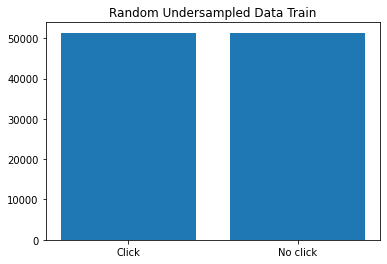

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

#X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, train_size=0.3, shuffle=False)
X_train = data_play_join[data_play_join['bid_month'] != 11]
X_train.drop('click', axis=1, inplace=True)
X_train.drop('bid_month', axis=1, inplace=True)
y_train = data_play_join[data_play_join['bid_month'] != 11]['click']

#Since there are much more '0' clicks than '1' clicks, I will undersample (I verified that no undersampling give 
#precision 0.93 for '0' but 0.0 for '1'
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

X_test = data_play_join[data_play_join['bid_month'] == 11]
X_test.drop('click', axis=1, inplace=True)
X_test.drop('bid_month', axis=1, inplace=True)
y_test = data_play_join[data_play_join['bid_month'] == 11]['click']

plt.bar(['Click', 'No click'], height=[sum(y_undersampled==0), sum(y_undersampled==1)])
plt.title('Random Undersampled Data Train')
plt.show()

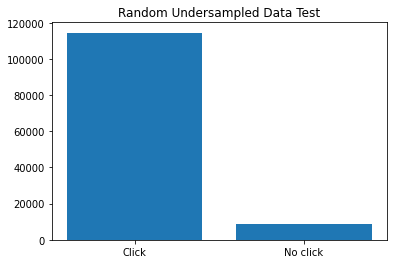

In [37]:
plt.bar(['Click', 'No click'], height=[sum(y_test==0), sum(y_test==1)])
plt.title('Random Undersampled Data Test')
plt.show()

In [38]:
def fitPredictAndPrint(model, X_train, y_train, X_test, y_test, label):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(label)
    print(confusion_matrix(y_true=y_test,y_pred=y_pred))
    print(classification_report(y_true=y_test, y_pred = y_pred))
    print("*****************************************************")
    
def predictAndPrint(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    print(label)
    print(confusion_matrix(y_true=y_test,y_pred=y_pred))
    print(classification_report(y_true=y_test, y_pred = y_pred))
    print("*****************************************************")

In [40]:
#Do a first estimate
lr = LogisticRegression()
fitPredictAndPrint(lr, X_undersampled, y_undersampled, X_test, y_test, "Linear regression")

#The first naive model is not able to predict the 'click == 1' result. Hence - need to handle the imbalance
#Record the results (precision of '1' is still low)
# [[54552 60339]
#  [ 2888  6200]]
#               precision    recall  f1-score   support

#            0       0.95      0.47      0.63    114891
#            1       0.09      0.68      0.16      9088

#     accuracy                           0.49    123979
#    macro avg       0.52      0.58      0.40    123979
# weighted avg       0.89      0.49      0.60    123979

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear regression
[[53446 61102]
 [ 2713  6257]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63    114548
           1       0.09      0.70      0.16      8970

    accuracy                           0.48    123518
   macro avg       0.52      0.58      0.40    123518
weighted avg       0.89      0.48      0.59    123518

*****************************************************


In [41]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold 
#Try a grid search for Logistic Classifier
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv,scoring='balanced_accuracy',error_score=0)
grid_result = grid_search.fit(X_undersampled, y_undersampled)

In [42]:
print("Best model score: {}".format(grid_result.best_score_))
print(grid_result.best_estimator_.get_params())

Best model score: 0.5954782902690755
{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [43]:
#Test the best estimator
optimised_logistic = grid_result.best_estimator_

predictAndPrint(optimised_logistic, X_test, y_test, "Optimal Logistic Regression parameters:")
#There is actually no visible improvement using the grind search
# [[53440 61467]
#  [ 2775  6265]]
#               precision    recall  f1-score   support

#            0       0.95      0.47      0.62    114907
#            1       0.09      0.69      0.16      9040

#     accuracy                           0.48    123947
#    macro avg       0.52      0.58      0.39    123947
# weighted avg       0.89      0.48      0.59    123947

Optimal Logistic Regression parameters:
[[53309 61239]
 [ 2703  6267]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63    114548
           1       0.09      0.70      0.16      8970

    accuracy                           0.48    123518
   macro avg       0.52      0.58      0.39    123518
weighted avg       0.89      0.48      0.59    123518

*****************************************************


In [ ]:
#Trying with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from pprint import pprint 

model_params = {
    'n_estimators': [4, 10, 50, 100, 204],
    'max_features': [1, 2, 3, 4],
    'min_samples_split': [2, 3, 5, 10]
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 10 models over 5 folds of cross validation (50 models total)
clf = GridSearchCV(rf_model, model_params, cv=5)

# train the random search meta-estimator to find the best model out of 10 candidates
model = clf.fit(X_undersampled, y_undersampled)


In [ ]:
print("Best random forest model score: {}".format(clf.best_score_))
print(clf.best_estimator_.get_params())

In [ ]:
#https://stackoverflow.com/questions/45074698/how-to-pass-elegantly-sklearns-gridseachcvs-best-parameters-to-another-model
#new_knn_model.set_params(**knn_gridsearch_model.best_params_)
optimized_rf_model = RandomForestClassifier(**clf.best_params_)
fitPredictAndPrint(optimized_rf_model, X_undersampled, y_undersampled, X_test, y_test, "Optimal Randonm Forest:")

In [ ]:
!aws s3 cp '/home/ubuntu/notebooks/intro_to_ml/day_6/FinalProject-amitkatz.ipynb' s3://uatt-e1-amitkatz/intro_to_ml/day_6/FinalProject-amitkatz.ipynb